We want to see if there is a connection between the parsed statements from the question and the question itself.

"Both semantic and lexical similarity are used to evaluate the accuracy of statements and evidence predictions. The final evaluation metric is the Macro F1 score, applied to both statement parsing and statement-evidence pair extraction."

In [1]:
data = {
"question": "There are 7 outstanding students G, H, L, M, U, W and Z in a school.During the summer vacation, the school will send them to the United Kingdom and the United States for inspection.The school has only 7 students participating in this activity, and each person happens to go to one of these two countries. Considering the specialty of each student, this activity must meet the following conditions? (1) If G goes to the UK, then H To the United States.(2) If L goes to the UK, both M and U go to the US.(3) The country W went to was different from the country Z went to.(4) The country where U goes is different from the country where G goes.(5) If Z goes to the UK, then H also goes to the UK.\nIf G goes to the United States, which of the following must be true?\nA.H go to the UK\nB.L go to America\nC.M go to the UK\nD.W go to America",
"question_parsing": [
    "There are 7 outstanding students G, H, L, M, U, W and Z in a school.During the summer vacation, the school will send them to the United Kingdom and the United States for inspection.",
    "each person happens to go to one of these two countries",
    "If G goes to the UK, then H To the United States",
    "If L goes to the UK, both M and U go to the US",
    "The country W went to was different from the country Z went to",
    "The country where U goes is different from the country where G goes",
    "If Z goes to the UK, then H also goes to the UK",
    "G goes to the United States"
]}

In [2]:
# !pip install sentence-transformers

In [3]:
import tqdm as notebook_tqdm
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
question_parsing_embeddings = model.encode(data["question_parsing"])
question_embeddings = model.encode([data["question"]])


/Users/constanitnknapp/Dev/python/LLM-for-Structural-Reasoning/.venv-nlp-project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


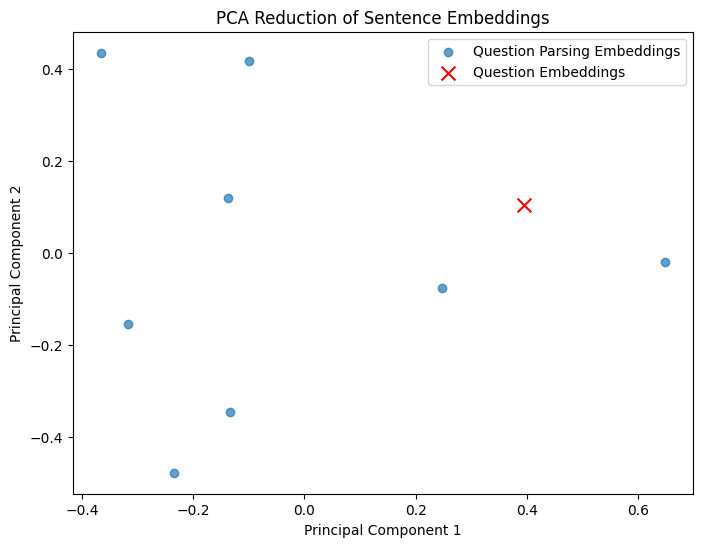

In [5]:
# run pca for visualisation
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

all_embeddings = np.vstack([question_parsing_embeddings, question_embeddings])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

question_parsing_embeddings_2d = all_embeddings_2d[:-len(question_embeddings)]
question_embeddings_2d = all_embeddings_2d[-len(question_embeddings):]

# Visualize the 2D embeddings
plt.figure(figsize=(8,6))
plt.scatter(question_parsing_embeddings_2d[:, 0], question_parsing_embeddings_2d[:, 1],
            label='Question Parsing Embeddings', alpha=0.7)
plt.scatter(question_embeddings_2d[:, 0], question_embeddings_2d[:, 1],
            label='Question Embeddings', color='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduction of Sentence Embeddings')
plt.legend()
plt.show()